In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv("House_Rent_Dataset.csv")
import warnings
warnings.filterwarnings(action = "ignore")
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
feature scaling
1. normaliztion
2. standard scaler

# outlier

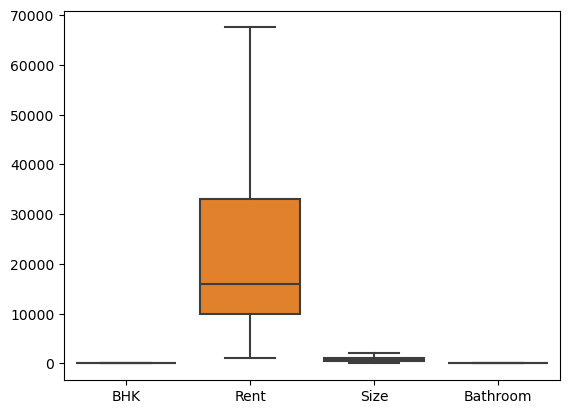

In [2]:
#Rent
Q1 = data['Rent'].quantile(0.25)
Q3 = data['Rent'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the respective bounds
data['Rent'] = np.where(data['Rent'] > upper_bound, upper_bound, 
                        np.where(data['Rent'] < lower_bound, lower_bound, data['Rent']))

#Size
Q1 = data['Size'].quantile(0.25)
Q3 = data['Size'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['Size'] = np.where(data['Size'] > upper_bound, upper_bound, 
                        np.where(data['Size'] < lower_bound, lower_bound, data['Size']))
#BHK
Q1 = data['BHK'].quantile(0.25)
Q3 = data['BHK'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['BHK'] = np.where(data['BHK'] > upper_bound, upper_bound, 
                        np.where(data['BHK'] < lower_bound, lower_bound, data['BHK']))

#Batho
Q1 = data['Bathroom'].quantile(0.25)
Q3 = data['Bathroom'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['Bathroom'] = np.where(data['Bathroom'] > upper_bound, upper_bound, 
                        np.where(data['Bathroom'] < lower_bound, lower_bound, data['Bathroom']))
sns.boxplot(data)
df = data
df.head()
df = df.drop(columns = ["Posted On"])
df = df.drop(columns = ["Point of Contact"])

<Axes: >

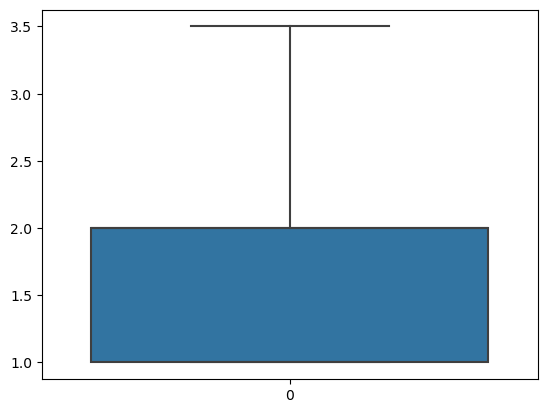

In [3]:
sns.boxplot(df["Bathroom"])

City
Bangalore     947.794582
Chennai      1000.839506
Delhi         752.522314
Hyderabad    1123.835253
Kolkata       781.240458
Mumbai        879.064815
Name: Size, dtype: float64
City
Bangalore    18740.067720
Chennai      18705.562290
Delhi        23485.950413
Hyderabad    18599.403226
Kolkata      11430.479008
Mumbai       48343.738683
Name: Rent, dtype: float64


<Axes: xlabel='City'>

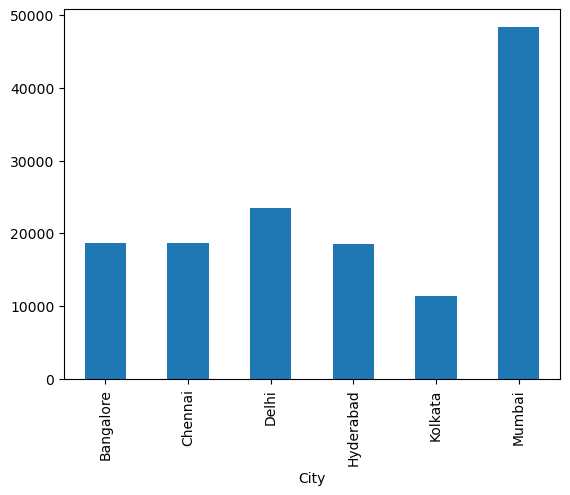

In [4]:
val = df.groupby(df["City"])["Size"].mean()
print(val)
plt.scatter(df["City"],df["Size"],color = "red")

val = df.groupby(df["City"])["Rent"].mean()
print(val)
val.plot(kind = "bar")

# dummy varbles

In [5]:
df = pd.get_dummies(df,columns =["Area Type","City","Furnishing Status","Tenant Preferred"],drop_first = True)
df

,BHK,Rent,Size,Floor,Area Locality,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2.0,10000.0,1100.0,Ground out of 2,Bandel,2.0,False,True,False,False,False,True,False,False,True,True,False
1,2.0,20000.0,800.0,1 out of 3,"Phool Bagan, Kankurgachi",1.0,False,True,False,False,False,True,False,True,False,True,False
2,2.0,17000.0,1000.0,1 out of 3,Salt Lake City Sector 2,1.0,False,True,False,False,False,True,False,True,False,True,False
3,2.0,10000.0,800.0,1 out of 2,Dumdum Park,1.0,False,True,False,False,False,True,False,False,True,True,False
4,2.0,7500.0,850.0,1 out of 2,South Dum Dum,1.0,True,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2.0,15000.0,1000.0,3 out of 5,Bandam Kommu,2.0,True,False,False,False,True,False,False,True,False,True,False
4742,3.0,29000.0,2000.0,1 out of 4,"Manikonda, Hyderabad",3.0,False,True,False,False,True,False,False,True,False,True,False
4743,3.0,35000.0,1750.0,3 out of 5,"Himayath Nagar, NH 7",3.0,True,False,False,False,True,False,False,True,False,True,False
4744,3.0,45000.0,1500.0,23 out of 34,Gachibowli,2.0,True,False,False,False,True,False,False,True,False,False,True


# labelencoder dummy varibles in the one columns

In [6]:
le = LabelEncoder()
df["Floor"] = le.fit_transform(df["Floor"])
df["Area Locality"] = le.fit_transform(df["Area Locality"])
df.head()

,BHK,Rent,Size,Floor,Area Locality,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2.0,10000.0,1100.0,455,221,2.0,False,True,False,False,False,True,False,False,True,True,False
1,2.0,20000.0,800.0,14,1527,1.0,False,True,False,False,False,True,False,True,False,True,False
2,2.0,17000.0,1000.0,14,1760,1.0,False,True,False,False,False,True,False,True,False,True,False
3,2.0,10000.0,800.0,10,526,1.0,False,True,False,False,False,True,False,False,True,True,False
4,2.0,7500.0,850.0,10,1890,1.0,True,False,False,False,False,True,False,False,True,False,False


# refrence value

In [7]:
area = pd.concat([df["Area Locality"], data["Area Locality"]],axis=1)
floor = pd.concat([df["Floor"],data["Floor"]],axis = 1)
# Rename the columns if needed
db = pd.concat([area,floor],axis = 1)
db.columns = ['Area Locality 1', 'Area Locality 2',"Floor1","Floor2"]

db.head(30)

,Area Locality 1,Area Locality 2,Floor1,Floor2
0,221,Bandel,455,Ground out of 2
1,1527,"Phool Bagan, Kankurgachi",14,1 out of 3
2,1760,Salt Lake City Sector 2,14,1 out of 3
3,526,Dumdum Park,10,1 out of 2
4,1890,South Dum Dum,10,1 out of 2
5,1975,Thakurpukur,447,Ground out of 1
6,1184,Malancha,458,Ground out of 4
7,1184,Malancha,10,1 out of 2
8,1476,"Palm Avenue Kolkata, Ballygunge",10,1 out of 2
9,1358,Natunhat,14,1 out of 3


In [8]:
y = df["Rent"]

# Drop the "Rent" column to create the features dataframe
x = df.drop(columns=["Rent"])

# Standardize the features


In [9]:
x

,BHK,Size,Floor,Area Locality,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2.0,1100.0,455,221,2.0,False,True,False,False,False,True,False,False,True,True,False
1,2.0,800.0,14,1527,1.0,False,True,False,False,False,True,False,True,False,True,False
2,2.0,1000.0,14,1760,1.0,False,True,False,False,False,True,False,True,False,True,False
3,2.0,800.0,10,526,1.0,False,True,False,False,False,True,False,False,True,True,False
4,2.0,850.0,10,1890,1.0,True,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2.0,1000.0,271,219,2.0,True,False,False,False,True,False,False,True,False,True,False
4742,3.0,2000.0,16,1214,3.0,False,True,False,False,True,False,False,True,False,True,False
4743,3.0,1750.0,271,724,3.0,True,False,False,False,True,False,False,True,False,True,False
4744,3.0,1500.0,226,590,2.0,True,False,False,False,True,False,False,True,False,False,True


In [10]:
y

0       10000.0
1       20000.0
2       17000.0
3       10000.0
4        7500.0
         ...   
4741    15000.0
4742    29000.0
4743    35000.0
4744    45000.0
4745    15000.0
Name: Rent, Length: 4746, dtype: float64

In [24]:
k = x.corr()
for i in k:
    for j in k:
        if k.loc[i,j] >= abs(0.5) :
            print(i,j)

BHK BHK
BHK Size
BHK Bathroom
Size BHK
Size Size
Size Bathroom
Floor Floor
Area Locality Area Locality
Bathroom BHK
Bathroom Size
Bathroom Bathroom
Area Type_Carpet Area Area Type_Carpet Area
Area Type_Super Area Area Type_Super Area
City_Chennai City_Chennai
City_Delhi City_Delhi
City_Hyderabad City_Hyderabad
City_Kolkata City_Kolkata
City_Mumbai City_Mumbai
Furnishing Status_Semi-Furnished Furnishing Status_Semi-Furnished
Furnishing Status_Unfurnished Furnishing Status_Unfurnished
Tenant Preferred_Bachelors/Family Tenant Preferred_Bachelors/Family
Tenant Preferred_Family Tenant Preferred_Family


# train and test the data

In [25]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x,y,test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((3796, 16), (950, 16), (3796,), (950,))

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)




# lineear regression impleamentation

In [40]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(x_train_poly, y_train)


LinearRegression()

# score

The model is 0.7896487047227225 % accurate


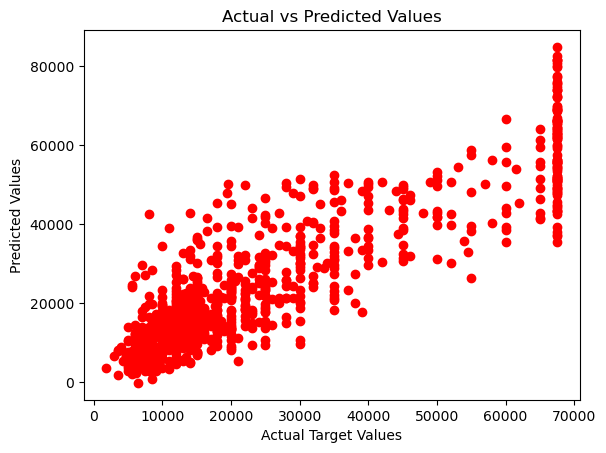

In [41]:
predi = lr.predict(x_test_poly)
score = lr.score(x_train_poly, y_train)
print("The model is",score,"% accurate")

plt.scatter(y_test,predi,color = "red")
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

The model is 78.96487047227225 % accurate


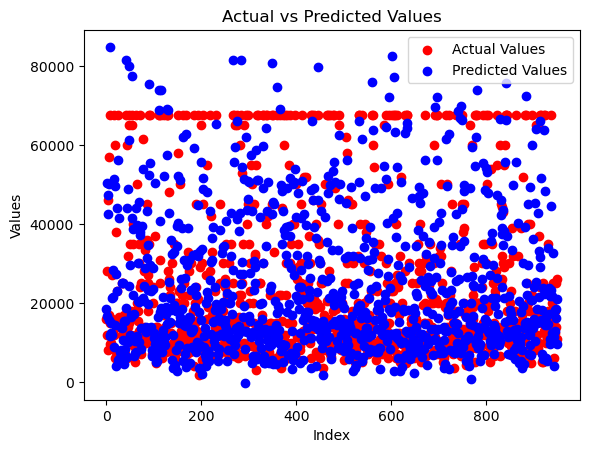

In [16]:
import matplotlib.pyplot as plt

# Assuming you already have predi, y_test, lr, x_train_poly, and y_train defined
predi = lr.predict(x_test_poly)
score = lr.score(x_train_poly, y_train)
print("The model is", score * 100, "% accurate")

# Plotting actual vs predicted values
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Values')
plt.scatter(range(len(predi)), predi, color='blue', label='Predicted Values')

plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Actual vs Predicted Values")
plt.legend()  # Adding legend to distinguish between actual and predicted values
plt.show()


In [17]:
correlation = np.corrcoef(y_test, predi)[0, 1]
print("Pearson Correlation:", correlation)

Pearson Correlation: 0.8898469614277903


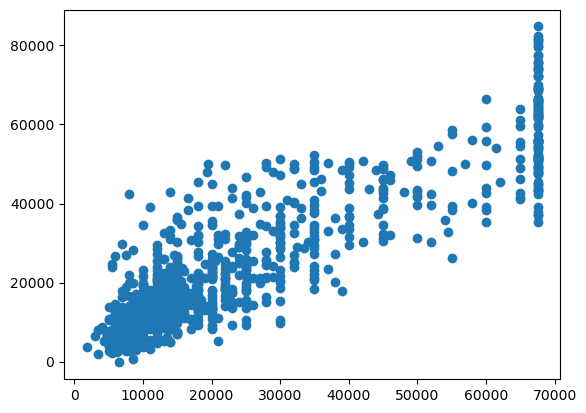

In [25]:
plt.scatter(x = y_test, y = predi)

# model

In [18]:
specific_input = [[2, 800, 14, 221, 2,False, True, False, False, False, True, False, True, False, True, False]]
specific_input_scaled = scaler.transform(specific_input)
specific_input_poly = poly.transform(specific_input_scaled)
specific_prediction = lr.predict(specific_input_poly)
print("Specific Input Prediction: ",specific_prediction)


Specific Input Prediction:  [9590.5]


# error caculation

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
mae = mean_absolute_error(y_test, predi)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 6455.676578947368


In [21]:
mse = mean_squared_error(y_test, predi)
print(mse)

80899676.63717106


In [22]:
r2 = r2_score(y_test, predi)
print("Root Mean Squared Error (RMSE):", r2)

Root Mean Squared Error (RMSE): 0.7912995531936096


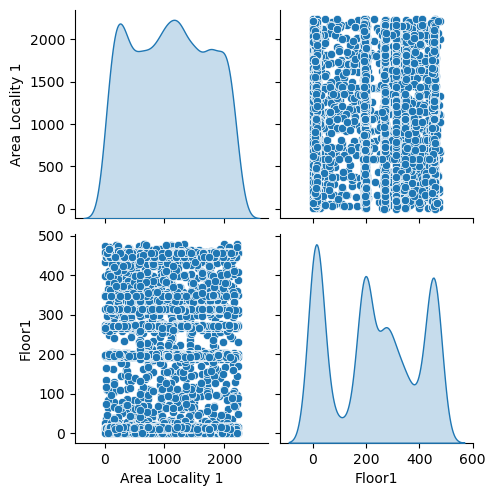

In [23]:
sns.pairplot(db, kind='scatter', diag_kind='kde')
plt.show()

In [24]:
db1 = pd.DataFrame(x_test_poly,y_test)
sns.pairplot(db1,kind = scatter,diag_kind = "kde" )

NameError: name 'scatter' is not defined

In [44]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample data
X = np.array([[1, 2], [2, 3], [4, 5], [3, 4], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11]])
y = np.array([3, 5, 7, 6, 8, 10, 12, 11, 13, 15])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating ridge and lasso regression models with alpha=1.0
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)

# Fitting the models
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Making predictions
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

# Coefficients and intercepts
print("Ridge coefficients:", ridge.coef_)
print("Ridge intercept:", ridge.intercept_)

print("Lasso coefficients:", lasso.coef_)
print("Lasso intercept:", lasso.intercept_)

# Evaluating the models
train_mse_ridge = mean_squared_error(y_train, y_pred_train_ridge)
test_mse_ridge = mean_squared_error(y_test, y_pred_test_ridge)

train_mse_lasso = mean_squared_error(y_train, y_pred_train_lasso)
test_mse_lasso = mean_squared_error(y_test, y_pred_test_lasso)

print("Ridge training MSE:", train_mse_ridge)
print("Ridge testing MSE:", test_mse_ridge)

print("Lasso training MSE:", train_mse_lasso)
print("Lasso testing MSE:", test_mse_lasso)


Ridge coefficients: [0.64102564 0.64102564]
Ridge intercept: 1.3076923076923084
Lasso coefficients: [1.15517241e+00 6.12536841e-17]
Lasso intercept: 2.6465517241379315
Ridge training MSE: 0.37804076265614744
Ridge testing MSE: 0.23734385272846859
Lasso training MSE: 0.5150862068965522
Lasso testing MSE: 0.0018579072532698428


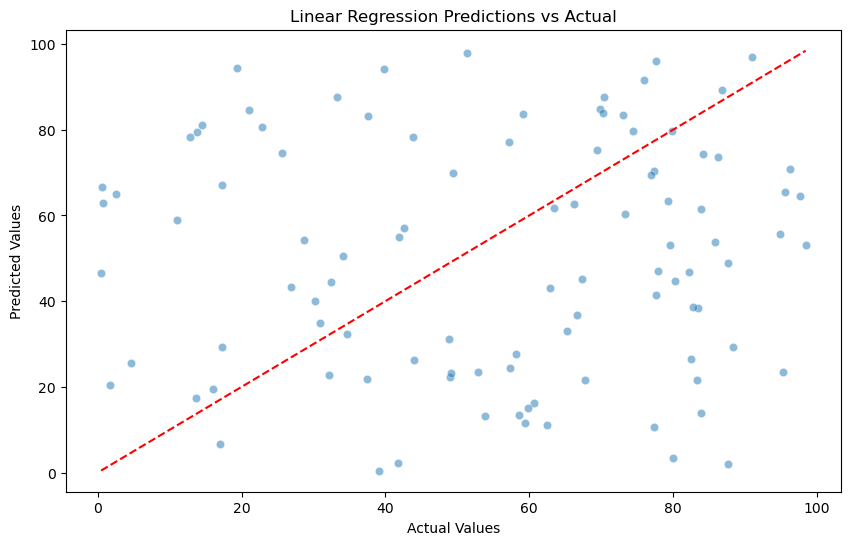

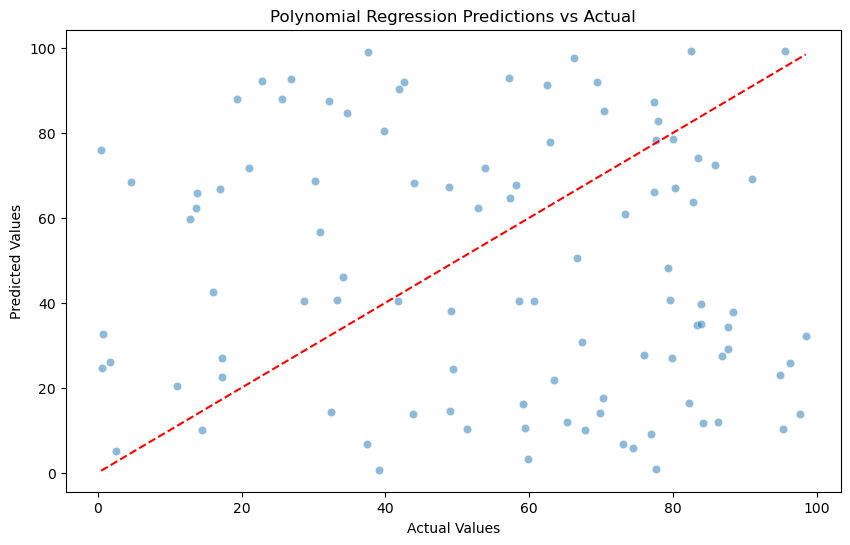

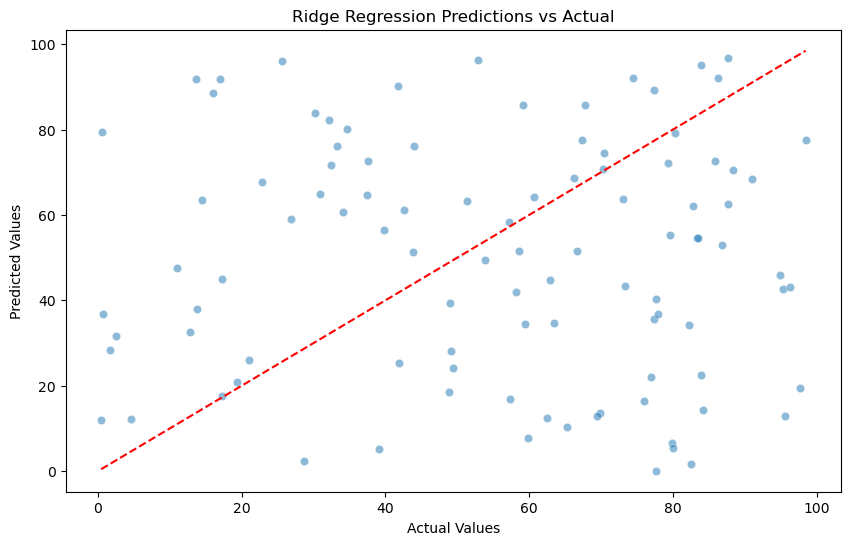

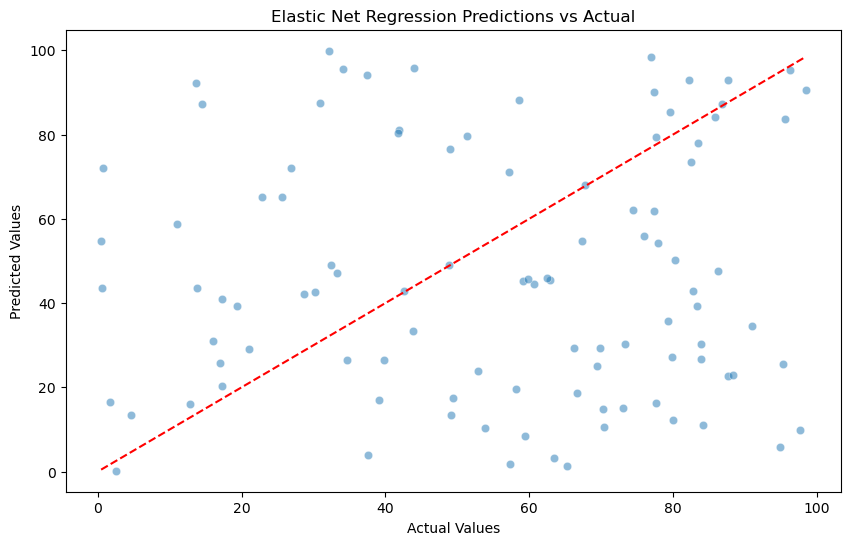

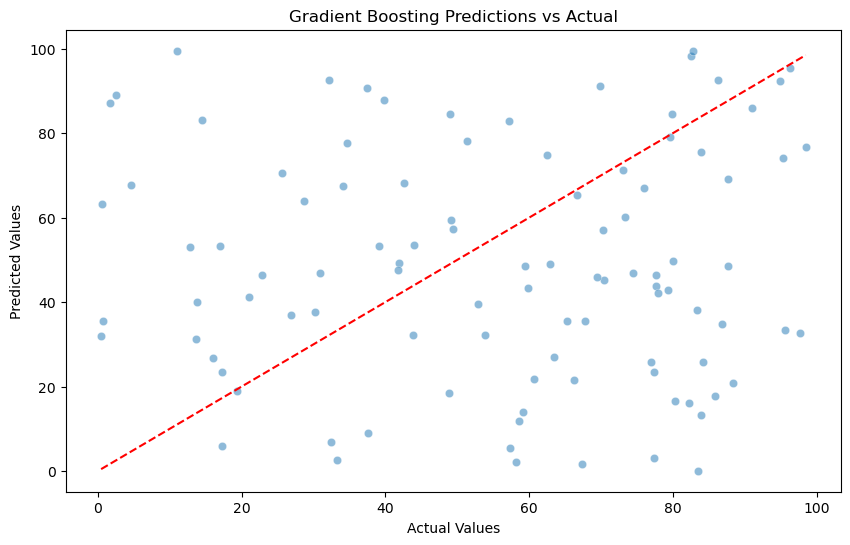

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have the following data arrays from your models
# y_actual: The actual target values
# y_pred_lr: Predictions from Linear Regression
# y_pred_pr: Predictions from Polynomial Regression
# y_pred_rr: Predictions from Ridge Regression
# y_pred_enr: Predictions from Elastic Net Regression
# y_pred_gb: Predictions from Gradient Boosting

# Example data (Replace with your actual data)
y_actual = np.random.rand(100) * 100  # Replace with actual target values
y_pred_lr = np.random.rand(100) * 100  # Replace with predictions from Linear Regression
y_pred_pr = np.random.rand(100) * 100  # Replace with predictions from Polynomial Regression
y_pred_rr = np.random.rand(100) * 100  # Replace with predictions from Ridge Regression
y_pred_enr = np.random.rand(100) * 100  # Replace with predictions from Elastic Net Regression
y_pred_gb = np.random.rand(100) * 100  # Replace with predictions from Gradient Boosting

# Function to plot scatter plot
def plot_scatter(y_actual, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_actual, y=y_pred, alpha=0.5)
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Predictions vs Actual')
    plt.show()

# Plot for each model
plot_scatter(y_actual, y_pred_lr, 'Linear Regression')
plot_scatter(y_actual, y_pred_pr, 'Polynomial Regression')
plot_scatter(y_actual, y_pred_rr, 'Ridge Regression')
plot_scatter(y_actual, y_pred_enr, 'Elastic Net Regression')
plot_scatter(y_actual, y_pred_gb, 'Gradient Boosting')
